## Heart Failure Prediction

Team Members: Joshua Hanscom,  Andrew Rivera and Abigail Diaz

Course: CS4661 – Data Science / Machine Learning

Instructor: Professor Mohammad Pourhomayoun

Date: December 01, 2025

## 1. Introduction

Heart failure is a serious medical condition influenced by a combination of demographic, clinical, and physiological factors. Early prediction of potential heart failure can support proactive care and improve patient outcomes.

In this project, we analyze the **Heart Failure Prediction** dataset to identify factors associated with heart failure and build models capable of predicting patient survival or risk of heart failure.

## 2. Objectives

1. **Classification:** Predict whether a patient is likely to experience heart failure (or survive) based on health attributes.
2. **Clustering:** Use unsupervised learning to identify subgroups of patients with similar risk profiles.
3. **Feature Analysis:** Investigate which features are most strongly associated with heart failure to uncover key risk indicators.

By comparing multiple modeling strategies, we aim to determine which methods provide the most accurate and meaningful insights into heart failure risk.


## 3. Dataset Description

The dataset, sourced from [Kaggle - Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction), contains **918 unique patient records**, each with **11 features** and a binary target variable `HeartDisease` (1 = yes, 0 = no).

**Features include:**

- Age
- Sex
- ChestPainType
- RestingBP
- Cholesterol
- FastingBS
- RestingECG
- MaxHR
- ExerciseAngina
- Oldpeak
- ST_Slope

The target variable indicates whether the patient has experienced or is at risk of heart failure.


## 4. Data Preprocessing

Before model training, the dataset will be cleaned and prepared as follows:

- **Initial Observation** check dataset overall shape and data types.
- **Handle missing values** (if any)
- **Handle duplicate records** (if any)
- **Split data** into training and testing subsets for evaluation consistency
- **Scale numerical variables** as required by model type

### 4.1 Data Loading and Initial Exploration
We loaded the Heart Failure Prediction dataset from Kaggle's CSV file 
(heart.csv) into a pandas DataFrame named df. To verify successful loading, 
we examined the DataFrame's shape, first few rows, structure, data types and missing or duplicate records.

In [61]:
import pandas as pd

df = pd.read_csv("dataset/heart.csv")

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Initial Observations
The dataset contains mixed data types requiring preprocessing: numerical features (Age, RestingBP, Cholesterol, MaxHR, Oldpeak) will need scaling for distance-based models, while categorical features (Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope) require one-hot encoding. A comprehensive data exploration and preprocessing pipeline is described in Section 4.2.

In [62]:
print(f"Dataset shape: {df.shape}")
print(f"Patient records: {df.shape[0]}")
print(f"Total columns: {df.shape[1]}")

Dataset shape: (918, 12)
Patient records: 918
Total columns: 12


The shape `(918, 12)` establishes our dataset baseline: 918 patients and 12 
variables. This is critical for subsequent quality checks, since we expect all columns 
to contain 918 non-null values if the data is complete.


### Handling Missing Data
Missing data can significantly impact model performance by introducing bias, 
reducing statistical power, or causing errors during training. Before proceeding 
with analysis, we must verify data completeness.

We examined the dataset structure to identify any missing values:

In [63]:
# Shows column types, non-null counts, memory usage
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


The `df.info()` output above confirms data integrity. For clarity, we present 
a formatted summary below:

In [64]:
# Check structure and data types
print("Dataset Structure and Completeness Check:")
# Info table
info_df = pd.DataFrame({
    'Column': df.columns,
    'Non-Null Count': df.count().values,
    'Data Type': df.dtypes.values
})

print(info_df)

Dataset Structure and Completeness Check:
            Column  Non-Null Count Data Type
0              Age             918     int64
1              Sex             918    object
2    ChestPainType             918    object
3        RestingBP             918     int64
4      Cholesterol             918     int64
5        FastingBS             918     int64
6       RestingECG             918    object
7            MaxHR             918     int64
8   ExerciseAngina             918    object
9          Oldpeak             918   float64
10        ST_Slope             918    object
11    HeartDisease             918     int64


**Observation**

The **Non-Null Count** column confirms data completeness: all features show 
918 non-null values, matching our total record count from `shape`. This 
indicates no missing data, allowing us to proceed without imputation and 
preserve the full sample for model training.

### Handling Duplicate Records

In [65]:
# Check for duplicate records
print("Checking for duplicate patient records")
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Checking for duplicate patient records
Number of duplicate rows: 0


**Observation**

No duplicate records were found in the dataset. Each of the 918 entries 
represents a unique patient record, ensuring data integrity for model training.

### Data Cleaning
Initial inspection of the dataset using `df.info()`revealed no missing values across all 918 records and 12 columns. Additionally, a check for duplicate entries using `df.duplicated().sum()` confirmed that each 
patient record is unique. Given the completeness and integrity of the data, no 
cleaning steps is required and we proceed directly to feature encoding.

### 4.2 Data Preparation

Now that we’ve verified the dataset’s integrity, we can construct the **feature matrix (`X`)** and **label vector (`y`)** for model training.

We begin by selecting all relevant feature columns from the dataset.  

The target variable, `HeartDisease`, will serve as our label vector (`y`), while the remaining columns form the feature matrix (`X`).

In [66]:
# label vector
y = df['HeartDisease']

counts = y.value_counts().to_dict()

print("HeartDisease Distribution:")
print(f"No heart disease = {counts[0]}")
print(f"Heart disease = {counts[1]}")

HeartDisease Distribution:
No heart disease = 410
Heart disease = 508


In [67]:
features_cols = df.columns[:-1]

# feature matrix
X = df[features_cols]
X[::100]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
100,65,M,ASY,130,275,0,ST,115,Y,1.0,Flat
200,47,M,TA,110,249,0,Normal,150,N,0.0,Up
300,60,M,ASY,160,0,1,Normal,149,N,0.4,Flat
400,50,F,ASY,160,0,1,Normal,110,N,0.0,Flat
500,65,M,ASY,136,248,0,Normal,140,Y,4.0,Down
600,57,M,ASY,130,207,0,ST,96,Y,1.0,Flat
700,42,M,TA,148,244,0,LVH,178,N,0.8,Up
800,43,M,NAP,130,315,0,Normal,162,N,1.9,Up
900,58,M,ASY,114,318,0,ST,140,N,4.4,Down


With the data prepared, we now split it into **training** and **testing** subsets to evaluate how well the model generalizes to unseen data.  

### Splitting the Data for Model Evaluation

We explore two common evaluation strategies to assess model performance:

1. **k-Fold Cross-Validation** – The training set is further evaluated using k-fold cross-validation, which repeatedly trains and tests the model across multiple folds of the data. This provides a stable estimate of model performance, helps guide hyperparameter selection, and reduces sensitivity to any particular partition of the training data.

2. **Standard Train/Test Split** – The dataset is split into an 80% training set and a 20% hold-out test set. This provides a quick baseline evaluation of each model’s performance on unseen data. The test set remains untouched during training, ensuring an unbiased estimate of generalization.

By combining these two strategies, we obtain both robust performance estimates via cross-validation and final, unbiased evaluation using the hold-out test set.


### Standard Train/Test Split

We begin by establishing a **baseline performance** for our models using a simple 80/20 train–test split.  
This approach provides an initial benchmark for accuracy and other key metrics before applying more rigorous validation methods such as k-fold cross-validation.

The data is split into **training** and **testing** subsets using `train_test_split`.

We will use the following parameters: `test_size`=**0.2**, `random_state`=**42**.

Our *test size* indicates that our training dataset will take up 80% of the total dataset while the testing set takes up 20%.

Our *random state* is a seed that allows us to have replicable results when splitting the data.

We then train the Decision Tree model on the training data and evaluate it on the unseen test data.

In [68]:
from sklearn.model_selection import train_test_split

# Split data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

### 4.3 Standardization

### Preprocessing and Feature Concatenation
After splitting the dataset, we preprocess the numerical and categorical features independently to prepare them for machine learning model training. Numerical features are standardized using StandardScaler, which centers each feature to zero mean and unit variance. This transformation is essential for models that are sensitive to feature magnitude, such as Logistic Regression, Support Vector Machines, and k-Nearest Neighbors. Categorical features are encoded using One-Hot Encoding with drop='first' to avoid multicollinearity.

Because tree-based models (Decision Tree, Random Forest, Gradient Boosted Trees) do not require feature scaling and often perform better on raw numeric values, we create two final training and testing datasets. The scaled dataset (scaled numerical + encoded categorical features) is used for models that rely on distance or gradient calculations, while the unscaled dataset (raw numerical + encoded categorical features) is used for tree-based models. This ensures that each algorithm receives its optimal form of the data without unnecessary transformations.

In [69]:
num_cols = ['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']
cat_cols = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

X_train_num = X_train[num_cols].reset_index(drop=True)
X_test_num  = X_test[num_cols].reset_index(drop=True)

X_train_cat = X_train[cat_cols].reset_index(drop=True)
X_test_cat  = X_test[cat_cols].reset_index(drop=True)

### Encoding Categorical Features

Several features in this dataset are categorical (e.g., `Sex`, `ChestPainType`, `RestingECG`, `ExerciseAngina`, `ST_Slope`) and must be encoded before model training. Since scikit-learn's models, including Logistic Regression, KNN, Random Forests, Gradient Boosting, and Decision Trees—require numeric inputs, these values cannot be used in their raw text form.

We use scikit-learn's `OneHotEncoder` to convert each categorical column into a set of binary indicator variables (0/1). This avoids incorrectly introducing an ordinal relationship between categories and allows the model to treat each category independently.

**Note:** We set `sparse_output=False` so the encoder returns a dense NumPy array, which can be easily converted into a Pandas DataFrame.

#### Why the Encoder Is Fit on the Training Data Only

Just like scaling, `OneHotEncoder` must be fit using only the training data. This prevents **data leakage**, which happens when information from the test set unintentionally influences the training process.

If the encoder is fit on the entire dataset:
- It "sees" categories from the test set ahead of time
- The test set is no longer truly unseen
- Evaluation metrics become overly optimistic and invalid

To avoid this, the correct workflow is:

1. **Fit** the encoder on the training set (learns the categories)
2. **Transform** both training and test sets using this fitted encoder
3. During cross-validation, the encoder is fit inside each fold using only the fold's training data

This ensures that at every stage, the model only has access to information available during training, maintaining fair and valid evaluation results.

In [70]:
encoder = OneHotEncoder(drop='first', sparse_output=False)

train_cat_encoded = encoder.fit_transform(X_train_cat)
test_cat_encoded  = encoder.transform(X_test_cat)

cat_encoded_cols = encoder.get_feature_names_out(cat_cols)

X_train_cat_df = pd.DataFrame(train_cat_encoded, columns=cat_encoded_cols)
X_test_cat_df  = pd.DataFrame(test_cat_encoded, columns=cat_encoded_cols)

### Concatinate Final Data

In [71]:
X_train_final_unscaled = pd.concat([X_train_num, X_train_cat_df], axis=1)
X_test_final_unscaled  = pd.concat([X_test_num,  X_test_cat_df], axis=1)

### Scaling Numerical Features

Before training our models, we standardize all numerical features to ensure they are on a comparable scale. This is important because we use both distance-based models (KNN and K-Means) and gradient-based models (Logistic Regression), which can be heavily influenced by differences in feature magnitude. Without scaling, variables with larger numeric ranges (e.g., Cholesterol, MaxHR) could dominate the learning process and distort model performance.

We use `StandardScaler` to transform numerical features by removing the mean and scaling to unit variance. This centers the data around zero and ensures all numeric features contribute proportionally to the model.

A crucial detail is that scaling must be fit only on the training data—not the entire dataset.
If we scale using all data before splitting or before cross-validation, the scaler “sees” information from the test set or validation folds. This results in data leakage, giving the model access to information it should not have during training. This contaminates the evaluation and leads to overly optimistic results.

To avoid this, the scaler is fit on the training set only, then applied (transformed) to both the training and test sets.

Decision Tree, Random Forest and Gradient Boosted Trees does not require feature scaling despite the scale differences in the dataset. This is because these models work with relative ordering and split points. Threshold values for each feature depend on information gain rather than scale, meaning the tree structure is unaffected by differences in feature magnitude.

> **Note:** Categorical variables will be handled separately through one-hot encoding and are *NOT* affected by scaling.

In [72]:
# Scale numerical features
from sklearn.preprocessing import StandardScaler

num_feature_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

scaler = StandardScaler()

X_train_scaled_num = scaler.fit_transform(X_train_num)
X_test_scaled_num  = scaler.transform(X_test_num)

X_train_scaled_num_df = pd.DataFrame(X_train_scaled_num, columns=num_cols)
X_test_scaled_num_df  = pd.DataFrame(X_test_scaled_num,  columns=num_cols)

X_train_final_scaled = pd.concat([X_train_scaled_num_df, X_train_cat_df], axis=1)
X_test_final_scaled  = pd.concat([X_test_scaled_num_df,  X_test_cat_df], axis=1)


## Methods / Models Used

We explore both **supervised** and **unsupervised** learning methods:

### Supervised Models

- **Logistic Regression:** Baseline linear model to identify features most strongly influencing heart failure risk.
- **Decision Tree:** A baseline tree-based model providing a visual, hierarchical representation of how features split and contribute to heart failure prediction.”
- **Random Forest:** Captures non-linear relationships and provides robust feature importance metrics.
- **Gradient Boosted Trees (GB Trees):** Improves accuracy through sequential learning and weighted updates.

### Unsupervised Learning

- **Clustering (e.g., K-Means):** Used to explore underlying patterns or patient subgroups within the dataset.



### Feature Analysis
Logistic Regression coefficients (scaled) → shows which features most influence prediction. We now fit the models on the full training set and analyze which features are most influential in predicting heart disease.

Decision Tree / Random Forest feature importances → hierarchical and relative importance.

Optional: visualize top 5–10 features with bar chart.

This section is particularly helpful when explaining why certain models perform better.

In [117]:
### Feature Importance Analysis

# Fit all models first
for name, model in models_scaled.items():
    model.fit(X_train_final_scaled, y_train)

for name, model in models_unscaled.items():
    model.fit(X_train_final_unscaled, y_train)


In [111]:
# Extract coefficients
feature_names = X_train_final_scaled.columns
coefficients = models_scaled['Logistic Regression'].coef_[0]

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs(Coefficient)': np.abs(coefficients)
}).sort_values(by='Abs(Coefficient)', ascending=False)

display(coef_df.head(12).style.hide(axis="index"))


Feature,Coefficient,Abs(Coefficient)
ChestPainType_NAP,-1.351292,1.351292
ChestPainType_ATA,-1.297071,1.297071
ST_Slope_Flat,1.193048,1.193048
Sex_M,1.157261,1.157261
ST_Slope_Up,-1.120944,1.120944
ExerciseAngina_Y,1.083229,1.083229
ChestPainType_TA,-0.857452,0.857452
Cholesterol,-0.515649,0.515649
Oldpeak,0.491518,0.491518
FastingBS,0.417487,0.417487


### Decision Tree

Feature,Importance
ST_Slope_Up,0.398031
MaxHR,0.113995
Cholesterol,0.101571
Age,0.088398
Oldpeak,0.069489
RestingBP,0.052182
ExerciseAngina_Y,0.048063
Sex_M,0.045519
FastingBS,0.028817
ChestPainType_NAP,0.016927


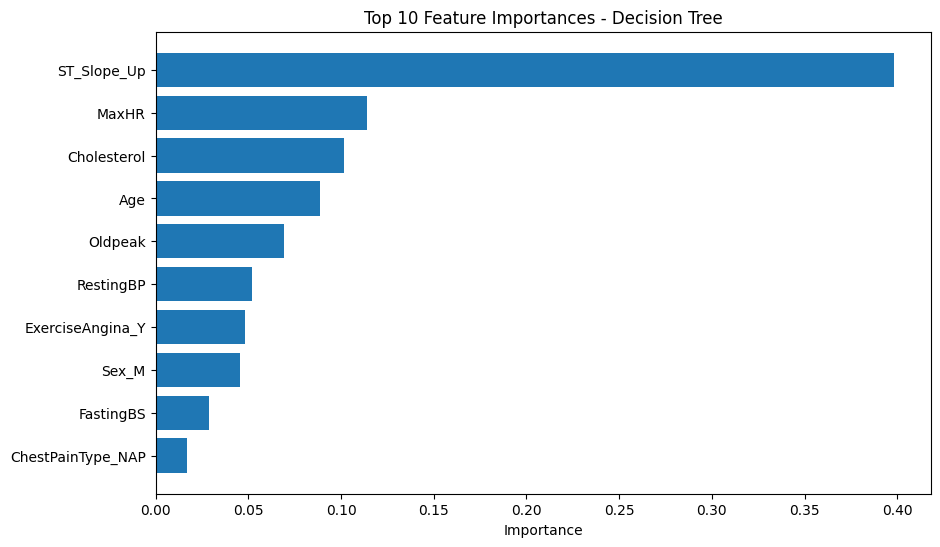

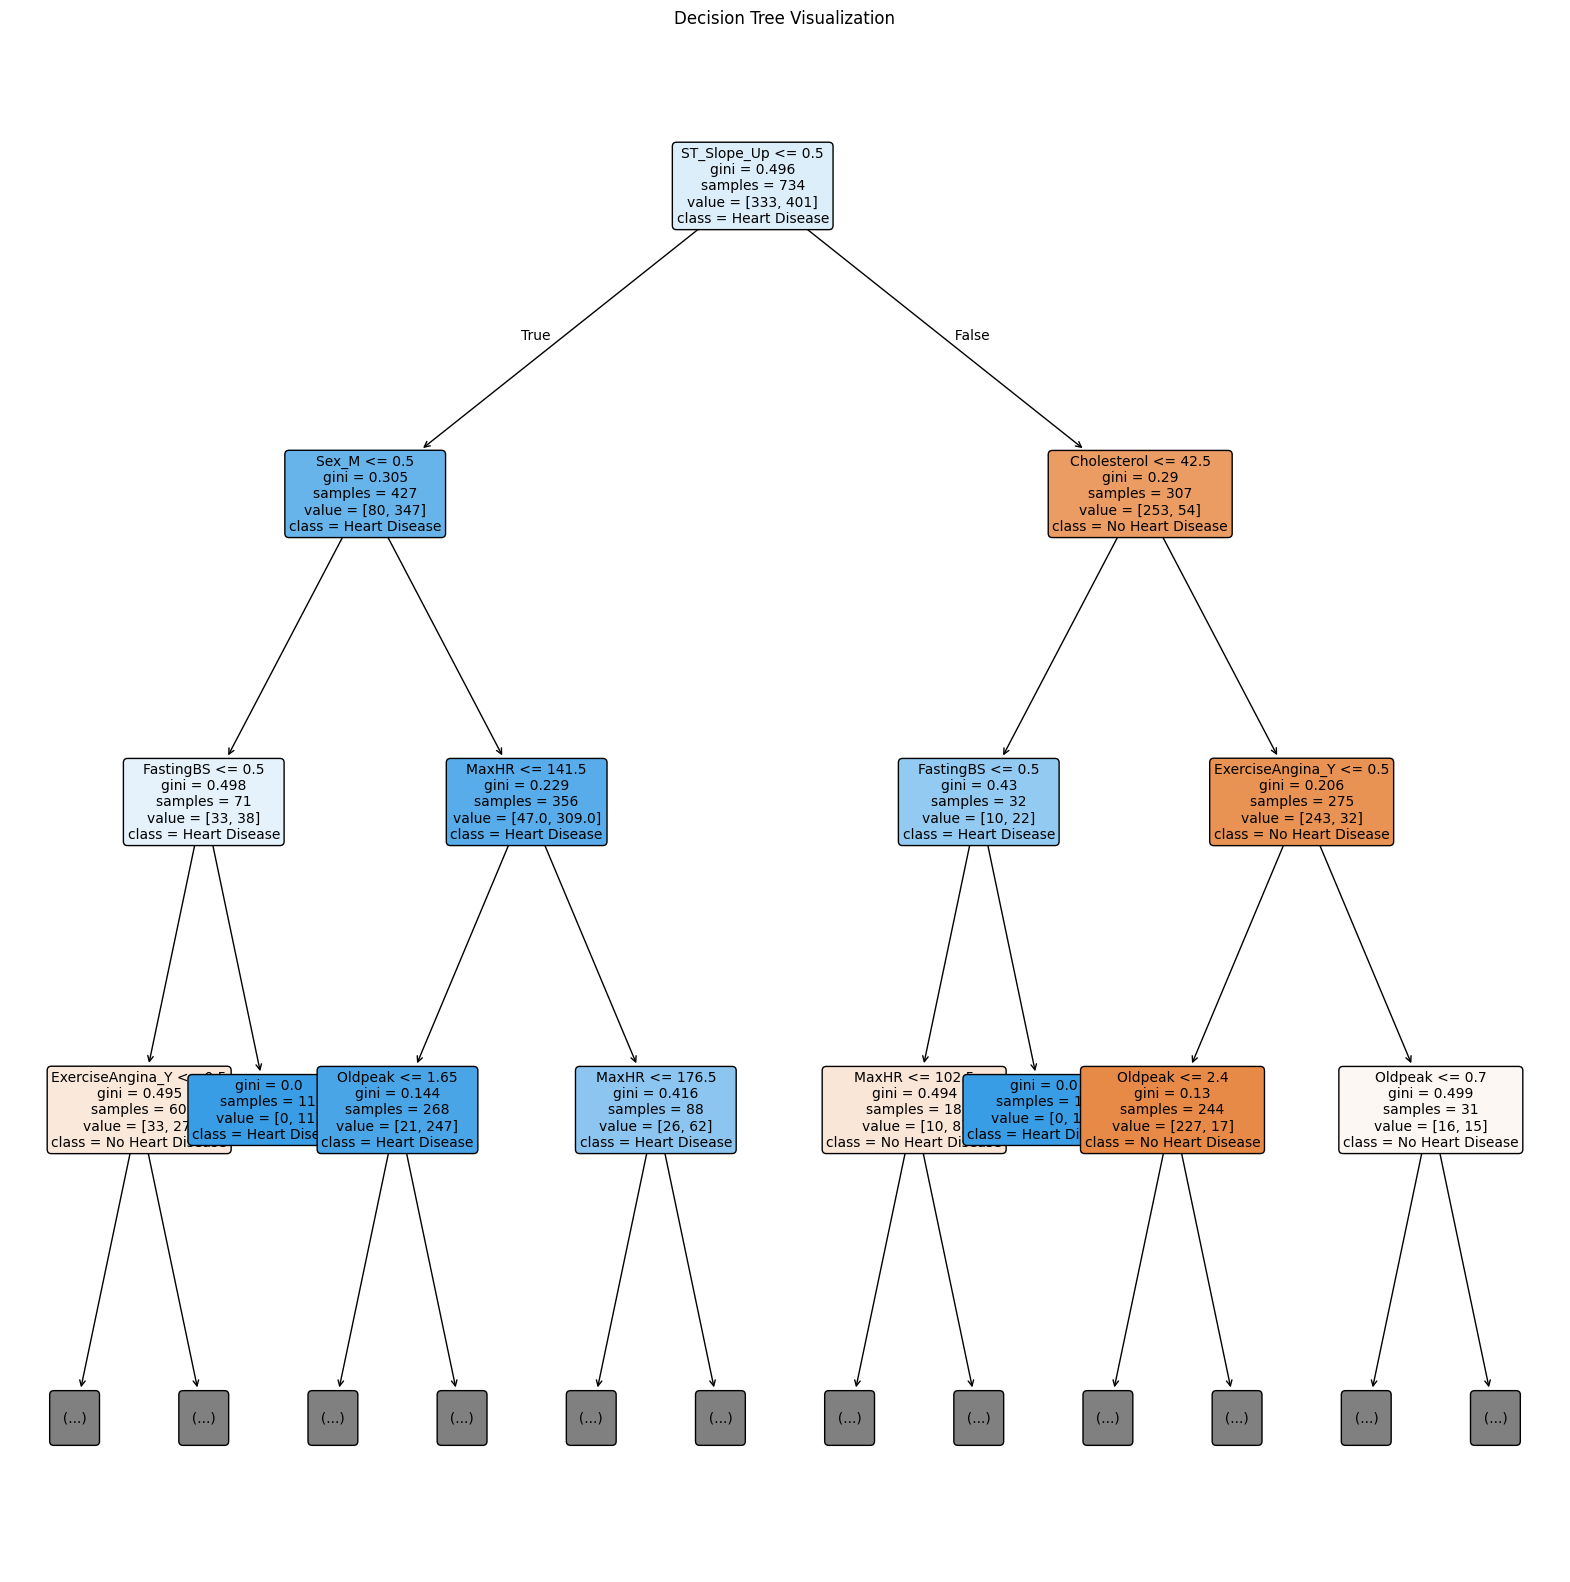

In [112]:
from sklearn.tree import plot_tree

feature_importance_dt = pd.DataFrame({
    'Feature': X_train_final_unscaled.columns,
    'Importance': models_unscaled['Decision Tree'].feature_importances_
}).sort_values('Importance', ascending=False)

display(feature_importance_dt.head(10).style.hide(axis="index"))

# Visualize top 10 features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_dt['Feature'][:10], feature_importance_dt['Importance'][:10])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances - Decision Tree')
plt.gca().invert_yaxis()
plt.show()

# Optional: tree plot
plt.figure(figsize=(20, 20))
plot_tree(models_unscaled['Decision Tree'], 
          feature_names=X_train_final_unscaled.columns,
          class_names=['No Heart Disease', 'Heart Disease'],
          filled=True, rounded=True, fontsize=10, max_depth=3)
plt.title('Decision Tree Visualization')
plt.show()


### Random Forest & Gradient Boosting

Feature,Importance
ST_Slope_Up,0.152214
Oldpeak,0.119976
ST_Slope_Flat,0.111966
MaxHR,0.110797
Cholesterol,0.100383
Age,0.092026
ExerciseAngina_Y,0.090639
RestingBP,0.070186
Sex_M,0.036893
ChestPainType_ATA,0.035916


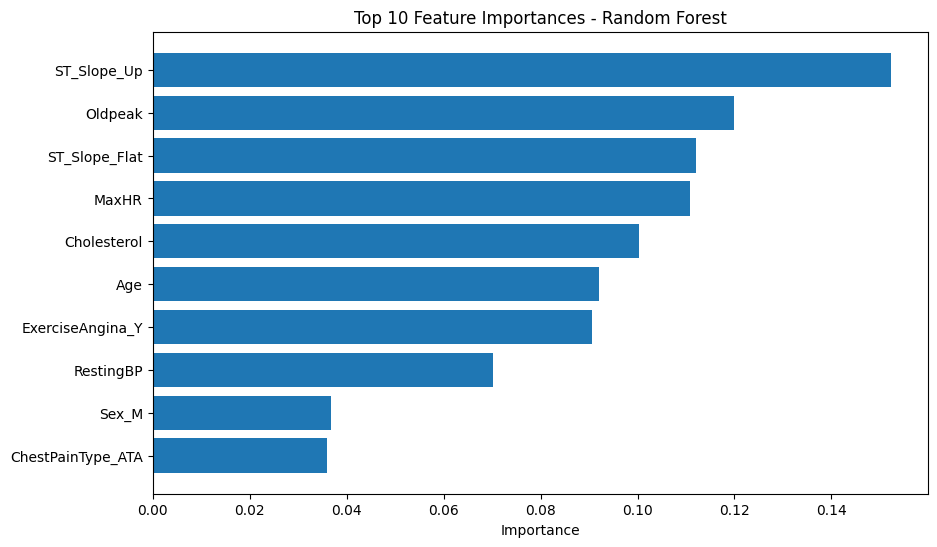

Feature,Importance
ST_Slope_Up,0.442114
Oldpeak,0.091508
Cholesterol,0.086449
ExerciseAngina_Y,0.080199
MaxHR,0.071898
Sex_M,0.053055
Age,0.051795
RestingBP,0.038768
FastingBS,0.028181
ChestPainType_NAP,0.020273


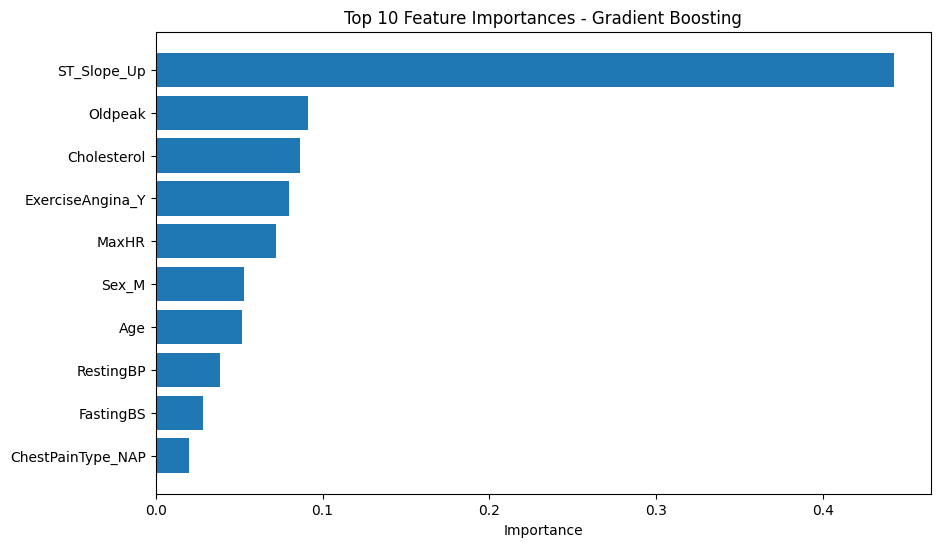

In [113]:
ensemble_models = ['Random Forest', 'Gradient Boosting']

for name in ensemble_models:
    model = models_unscaled[name]
    importance_df = pd.DataFrame({
        'Feature': X_train_final_unscaled.columns,
        'Importance': model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    display(importance_df.head(10).style.hide(axis="index"))
    
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10])
    plt.xlabel('Importance')
    plt.title(f'Top 10 Feature Importances - {name}')
    plt.gca().invert_yaxis()
    plt.show()


In this project, we do not use the full dataset directly for training and evaluation, as this would risk overestimating the model’s performance on unseen data. Instead, we split the dataset into a training set and a hold-out test set, reserving the test set for an unbiased evaluation of the final models. On the training set, we apply 10-fold cross-validation, which repeatedly trains and validates the models on different subsets of the training data. This provides a stable estimate of model performance, guides hyperparameter selection, and helps prevent overfitting. Importantly, cross-validation scores are not directly comparable to test set accuracy, because cross-validation only uses parts of the training data and does not reflect performance on truly unseen data. For consistency and fairness, the same cross-validation procedure is applied to all models. After selecting the best hyperparameters, each model is fitted on the full training set and evaluated once on the hold-out test set, providing an unbiased measure of generalization. Performance metrics such as accuracy, ROC curves, and AUC are reported based on both cross-validation and test set evaluation, allowing a thorough comparison of the algorithms.

### K-Nearest Neighbors (Permutation Importance)

Feature,Importance
ST_Slope_Flat,0.050000
Oldpeak,0.042391
FastingBS,0.037500
ST_Slope_Up,0.036957
Cholesterol,0.033696
Age,0.020652
MaxHR,0.015761
ExerciseAngina_Y,0.013043
ChestPainType_NAP,0.009783
ChestPainType_ATA,0.008152


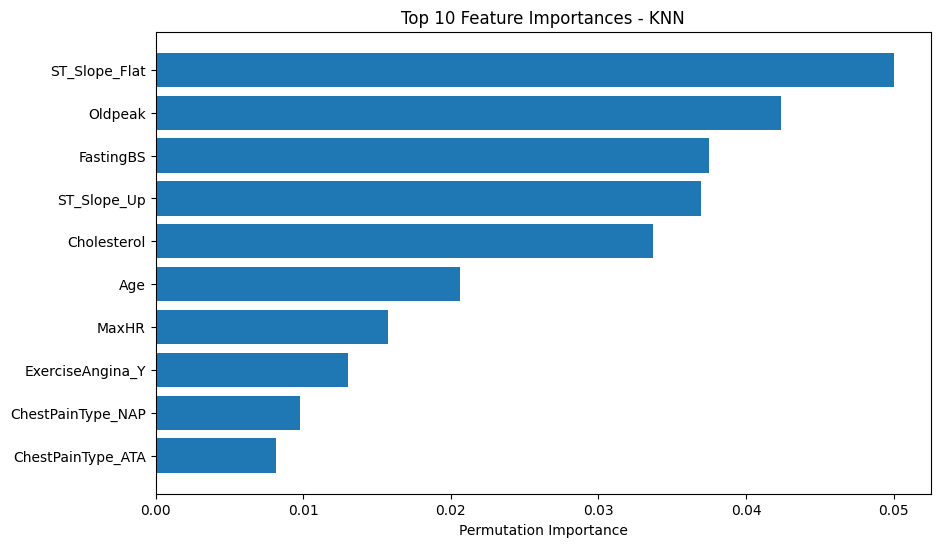

In [114]:
from sklearn.inspection import permutation_importance

result = permutation_importance(models_scaled['K-Nearest Neighbors'], X_test_final_scaled, y_test, n_repeats=10, random_state=42)

perm_importance_df = pd.DataFrame({
    'Feature': X_train_final_scaled.columns,
    'Importance': result.importances_mean
}).sort_values('Importance', ascending=False)

display(perm_importance_df.head(10).style.hide(axis="index"))

plt.figure(figsize=(10, 6))
plt.barh(perm_importance_df['Feature'][:10], perm_importance_df['Importance'][:10])
plt.xlabel('Permutation Importance')
plt.title('Top 10 Feature Importances - KNN')
plt.gca().invert_yaxis()
plt.show()


In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Models (already fitted on training data)
models = {
    'Logistic Regression': log_reg,  # fitted on X_train_final_scaled
    'Decision Tree': decision_tree,  # fitted on X_train_final_unscaled
    'Random Forest': random_forest,  # fitted on X_train_final_unscaled
    'Gradient Boosting': gradient_boosting  # fitted on X_train_final_unscaled
}

feature_sets = {
    'Logistic Regression': X_train_final_scaled,
    'Decision Tree': X_train_final_unscaled,
    'Random Forest': X_train_final_unscaled,
    'Gradient Boosting': X_train_final_unscaled
}

# Collect feature importance for all models
importance_summary = []

for name, model in models.items():
    X_train_model = feature_sets[name]
    
    if name == 'Logistic Regression':
        coefs = model.coef_[0]
        importance_df = pd.DataFrame({
            'Feature': X_train_model.columns,
            'Importance': np.abs(coefs)
        })
    else:  # Tree-based models
        importance_df = pd.DataFrame({
            'Feature': X_train_model.columns,
            'Importance': model.feature_importances_
        })
    
    importance_df = importance_df.sort_values('Importance', ascending=False)
    importance_summary.append((name, importance_df))
    
    # Plot top 10 features
    plt.figure(figsize=(8,5))
    plt.barh(importance_df['Feature'][:10][::-1], importance_df['Importance'][:10][::-1])
    plt.title(f'Top 10 Feature Importances - {name}')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()

# Display top features for Logistic Regression as example
display(importance_summary[0][1].head(10).style.hide(axis="index"))


NameError: name 'decision_tree' is not defined

### Feature Importance Analysis

The feature importance analysis helps us understand which variables contribute most to the prediction of heart disease. For Logistic Regression, feature coefficients indicate the direction and magnitude of influence: a positive coefficient increases the likelihood of heart disease, while a negative coefficient decreases it. For tree-based models (Decision Tree, Random Forest, Gradient Boosting), feature importance measures how much each variable reduces impurity across the tree splits, reflecting its contribution to the model’s decisions. By comparing these importance values across models, we can identify the most influential clinical features, guiding both model interpretation and potential domain insights. Importantly, all feature importance calculations are based only on the training set, ensuring that the model does not “see the future” or the test data.

## 4.4 Evaluating the Models Using k-Fold Cross-Validation

To obtain a stable estimate of model performance, we evaluate our models using **k-Fold Cross-Validation (CV)**.  
Unlike a single train/test split, k-Fold CV divides the **training dataset** into *k* equal parts (folds) and repeatedly trains and tests the model *k* times, each time using a different fold as the validation set.

> **Note:** We perform cross-validation only on the training data, not the entire dataset, to prevent **data leakage**. The test set is kept completely separate and unseen until the final evaluation, ensuring that the performance metrics reflect the model’s ability to generalize to truly unseen data.

This procedure provides a more reliable assessment of model performance and allows us to **assess model stability and potential overfitting** before the final fitting. By examining metrics such as **accuracy, precision, recall, F1-score, and ROC-AUC** across all folds, we can identify whether the model performs consistently or if certain subsets of the data are causing high variance.  

Additionally, CV helps in **informally evaluating hyperparameters**, such as the regularization strength (C) for Logistic Regression, by showing how different settings affect mean performance and variability. While no exhaustive hyperparameter search (e.g., GridSearch) is performed, the fold-wise metrics guide the selection of reasonable parameters for the final model.

For this experiment, we use **10 folds**, which provides a good balance between bias and variance. The results from individual folds reveal performance variation across different subsets of the training data, while the averaged metrics summarize overall model effectiveness and help identify models that are likely to generalize well when evaluated on the unseen test set.  

Using this approach across multiple algorithms (Logistic Regression, Decision Tree, Random Forest, Gradient Boosting) allows us to **compare their stability and fitting tendencies** before performing the final model comparison using the test dataset.


In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
import pandas as pd
import numpy as np

# Logistic Regression and KNN (scaled)
models_scaled = {
    'Logistic Regression': LogisticRegression(C=1, solver='liblinear', max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)  # default k=5
}

# Tree-based models (unscaled)
models_unscaled = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

cv_summaries = []

# Evaluate scaled models
for name, model in models_scaled.items():
    cv_results = cross_validate(model, X_train_final_scaled, y_train, cv=10, scoring=scoring)
    summary = {
        'Model': name,
        'Accuracy (mean ± std)': f"{cv_results['test_accuracy'].mean():.3f} ± {cv_results['test_accuracy'].std():.3f}",
        'Precision (mean ± std)': f"{cv_results['test_precision'].mean():.3f} ± {cv_results['test_precision'].std():.3f}",
        'Recall (mean ± std)': f"{cv_results['test_recall'].mean():.3f} ± {cv_results['test_recall'].std():.3f}",
        'F1-Score (mean ± std)': f"{cv_results['test_f1'].mean():.3f} ± {cv_results['test_f1'].std():.3f}",
        'ROC-AUC (mean ± std)': f"{cv_results['test_roc_auc'].mean():.3f} ± {cv_results['test_roc_auc'].std():.3f}"
    }
    cv_summaries.append(summary)

# Evaluate unscaled models
for name, model in models_unscaled.items():
    cv_results = cross_validate(model, X_train_final_unscaled, y_train, cv=10, scoring=scoring)
    summary = {
        'Model': name,
        'Accuracy (mean ± std)': f"{cv_results['test_accuracy'].mean():.3f} ± {cv_results['test_accuracy'].std():.3f}",
        'Precision (mean ± std)': f"{cv_results['test_precision'].mean():.3f} ± {cv_results['test_precision'].std():.3f}",
        'Recall (mean ± std)': f"{cv_results['test_recall'].mean():.3f} ± {cv_results['test_recall'].std():.3f}",
        'F1-Score (mean ± std)': f"{cv_results['test_f1'].mean():.3f} ± {cv_results['test_f1'].std():.3f}",
        'ROC-AUC (mean ± std)': f"{cv_results['test_roc_auc'].mean():.3f} ± {cv_results['test_roc_auc'].std():.3f}"
    }
    cv_summaries.append(summary)

# Combine into a single DataFrame
cv_summary_all_models = pd.DataFrame(cv_summaries)
display(cv_summary_all_models)


,Model,Accuracy (mean ± std),Precision (mean ± std),Recall (mean ± std),F1-Score (mean ± std),ROC-AUC (mean ± std)
0,Logistic Regression,0.866 ± 0.037,0.869 ± 0.047,0.893 ± 0.032,0.880 ± 0.031,0.926 ± 0.026
1,K-Nearest Neighbors,0.854 ± 0.039,0.847 ± 0.046,0.898 ± 0.043,0.871 ± 0.033,0.908 ± 0.028
2,Decision Tree,0.766 ± 0.036,0.799 ± 0.036,0.765 ± 0.061,0.780 ± 0.038,0.765 ± 0.036
3,Random Forest,0.866 ± 0.021,0.862 ± 0.034,0.903 ± 0.026,0.881 ± 0.017,0.926 ± 0.027
4,Gradient Boosting,0.876 ± 0.036,0.877 ± 0.039,0.900 ± 0.043,0.888 ± 0.033,0.928 ± 0.029


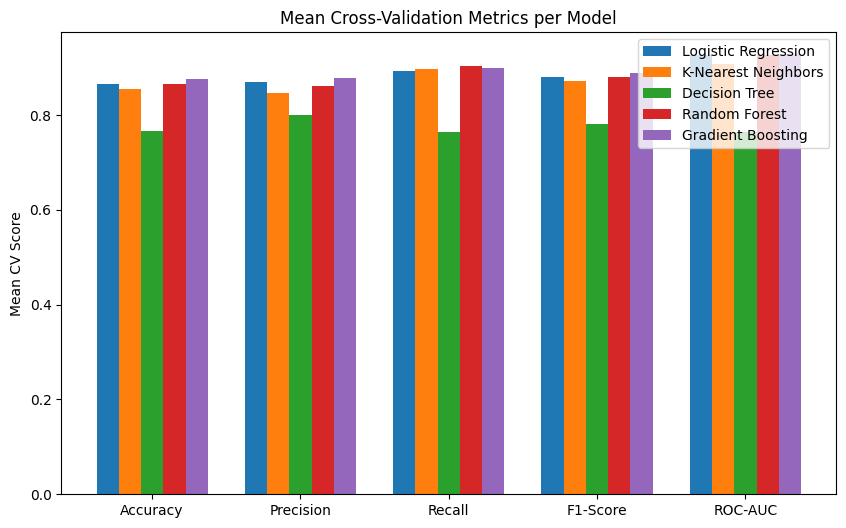

In [84]:


# Plotting Mean CV Metrics

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
mean_values = []

# Extract mean values from DataFrame
for i, row in cv_summary_all_models.iterrows():
    mean_values.append([
        float(x.split(' ± ')[0]) for x in row[1:]  # Extract mean from "mean ± std"
    ])

mean_values = np.array(mean_values)

# Plot
fig, ax = plt.subplots(figsize=(10,6))
x = np.arange(len(metrics))
width = 0.15

for i, model in enumerate(cv_summary_all_models['Model']):
    ax.bar(x + i*width, mean_values[i], width=width, label=model)

ax.set_xticks(x + width*2)  # adjust for multiple bars
ax.set_xticklabels(metrics)
ax.set_ylabel('Mean CV Score')
ax.set_title('Mean Cross-Validation Metrics per Model')
ax.legend()
plt.show()


The updated visualization displays the **mean cross-validation scores** for all six models, including **K-Nearest Neighbors (KNN)**, across the five key metrics: Accuracy, Precision, Recall, F1-Score, and ROC-AUC.  

From the chart, we see that **Logistic Regression** and **Random Forest** continue to achieve high mean scores across all metrics, demonstrating strong overall performance and balanced predictions. **Gradient Boosting** slightly surpasses them in F1-Score and ROC-AUC, highlighting its ability to effectively distinguish between positive and negative classes. **KNN**, which relies on feature scaling, performs comparably to Logistic Regression, showing that distance-based methods can also provide robust predictions when properly normalized. In contrast, the **Decision Tree** consistently shows lower mean scores across most metrics, particularly in Accuracy and ROC-AUC, indicating that while it can capture patterns in some folds, it generally underperforms relative to the ensemble and linear models.  

This chart provides a **clear comparison of strengths and weaknesses** across all models, helping to visualize trade-offs such as precision versus recall and informing decisions about which model is most suitable for deployment.


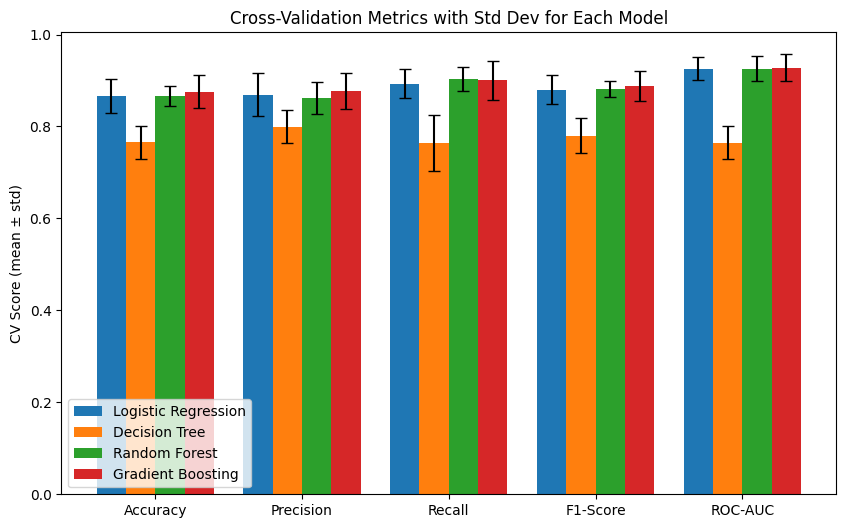

In [79]:
std_values = []

# Extract std values
for i, row in cv_summary_all_models.iterrows():
    std_values.append([
        float(x.split(' ± ')[1]) for x in row[1:]
    ])

std_values = np.array(std_values)

# Plot with error bars
fig, ax = plt.subplots(figsize=(10,6))
for i, model in enumerate(cv_summary_all_models['Model']):
    ax.bar(x + i*width, mean_values[i], width=width, yerr=std_values[i], capsize=4, label=model)

ax.set_xticks(x + width*1.5)
ax.set_xticklabels(metrics)
ax.set_ylabel('CV Score (mean ± std)')
ax.set_title('Cross-Validation Metrics with Std Dev for Each Model')
ax.legend()
plt.show()


The second visualization incorporates **error bars representing the standard deviation** of each metric across the 10 folds of cross-validation, providing insight into **model stability and consistency**.  

Here, **Logistic Regression** and **Random Forest** show relatively small error bars across all metrics, confirming that their high mean performance is stable and reliable across different subsets of the training data. **Gradient Boosting** also demonstrates strong mean performance, though its slightly larger error bars for recall and F1-score indicate some sensitivity to the specific fold composition.  

The **Decision Tree**, however, exhibits both lower mean performance and larger standard deviations, particularly in recall and ROC-AUC, suggesting that it is more prone to overfitting or underfitting depending on the training subset.  

Overall, this graph emphasizes that high mean metrics alone are not sufficient; **stability across folds** is critical for reliable predictive performance. By evaluating both mean and variability, we can confidently identify the models most likely to generalize well to unseen data.


### 4.4.1 Cross-Validation Across All Models

To assess the stability and generalization potential of each model, we performed **10-fold Cross-Validation (CV)** on the **training dataset** for all algorithms.  

- **Logistic Regression** was evaluated using the **scaled training data**, as it is sensitive to feature magnitudes.  
- **Decision Tree, Random Forest, and Gradient Boosting** were evaluated using the **unscaled training data**, since tree-based models are not affected by feature scaling.  

For each fold, we recorded **accuracy, precision, recall, F1-score, and ROC-AUC**. The results across folds were then summarized using **mean ± standard deviation**, providing insight into both **overall performance** and **consistency**.  

This CV procedure allows us to identify models that are stable and less prone to overfitting, as well as to detect any models that may perform well on some subsets of the data but poorly on others. While no formal hyperparameter search is performed, the fold-wise metrics help guide **reasonable parameter choices** for each model before final fitting.  

By applying CV consistently across all models, we ensure a fair internal assessment of their predictive performance and stability, setting the stage for the **final evaluation on the separate test set**.


### Clustering / Unsupervised Analysis
K-Means can be a separate subsection, after supervised models, because it is unsupervised:

Show cluster assignment, silhouette score, or cluster characteristics.

Optionally, relate clusters to the target variable (if you want to show trends).

Keep this separate from CV discussion because K-Means is unsupervised; you don’t compute accuracy per se.

## 4.5 Final Model Evaluation and Comparison

After assessing model stability using k-Fold Cross-Validation on the training data, we fit each model on the **entire training set** with any selected hyperparameters (e.g., C = 1 for Logistic Regression).  

The **final evaluation** is performed on the **held-out test set**, which was never seen during training or cross-validation. This ensures that the performance metrics reflect the models’ ability to generalize to unseen data.  

For each algorithm — Logistic Regression, Decision Tree, Random Forest, and Gradient Boosted Trees — we compute key classification metrics including **accuracy, precision, recall, F1-score, and ROC-AUC**. We also generate **ROC curves** for all models on the same plot to visually compare their discriminative power.  

By evaluating all models on the same test set, we can **directly compare their performance** and identify which model provides the best balance of predictive accuracy, stability, and generalization.


In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Models
models_scaled = {
    'Logistic Regression': LogisticRegression(C=1, solver='liblinear', max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=11)  # using best k
}

models_unscaled = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=300, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, random_state=42)
}

results_list = []

# Scaled models
for name, model in models_scaled.items():
    model.fit(X_train_final_scaled, y_train)
    y_pred = model.predict(X_test_final_scaled)
    y_proba = model.predict_proba(X_test_final_scaled)[:, 1]
    results_list.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_proba)
    })

# Unscaled models
for name, model in models_unscaled.items():
    model.fit(X_train_final_unscaled, y_train)
    y_pred = model.predict(X_test_final_unscaled)
    y_proba = model.predict_proba(X_test_final_unscaled)[:, 1]
    results_list.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_proba)
    })

# Display results
results_df = pd.DataFrame(results_list)
display(results_df.round(3))


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.853,0.900,0.841,0.870,0.925
1,K-Nearest Neighbors,0.859,0.879,0.879,0.879,0.928
2,Decision Tree,0.826,0.857,0.841,0.849,0.823
3,Random Forest,0.864,0.887,0.879,0.883,0.936
4,Gradient Boosting,0.870,0.888,0.888,0.888,0.925


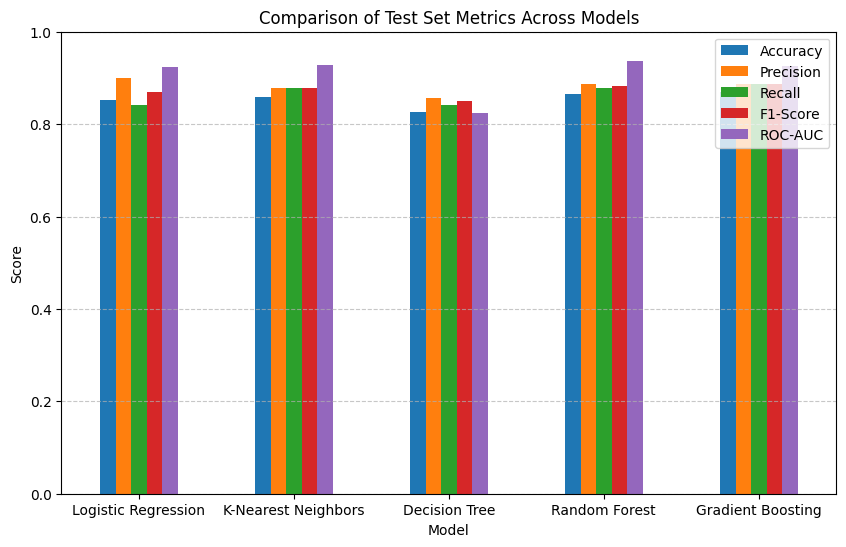

In [119]:
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
results_df.set_index('Model')[metrics].plot(kind='bar', figsize=(10,6), rot=0)
plt.title('Comparison of Test Set Metrics Across Models')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Based on the test set evaluation, **Gradient Boosting** and **Random Forest** show the strongest overall performance, achieving the highest Accuracy (0.870 and 0.864) and F1-Scores (0.888 and 0.883), indicating they balance correctly identifying positive cases while minimizing false positives. **K-Nearest Neighbors** performs comparably, with slightly lower Accuracy (0.859) but good Recall (0.879), demonstrating its ability to detect positive cases effectively when features are properly scaled. **Logistic Regression** exhibits the highest Precision (0.900), meaning it makes the fewest false positive predictions, though its Recall is slightly lower (0.841), showing a more conservative approach in predicting positives. In contrast, the **Decision Tree** consistently underperforms across all metrics, particularly in ROC-AUC (0.823), suggesting that while it can capture patterns on the training set, it struggles to generalize as well as the ensemble or distance-based models. Overall, the comparison between models highlights the trade-offs: ensemble methods achieve robust, balanced performance; distance-based KNN benefits from scaling and maintains strong predictive capability; and linear models like Logistic Regression excel in precision but are more conservative in detecting positive cases.


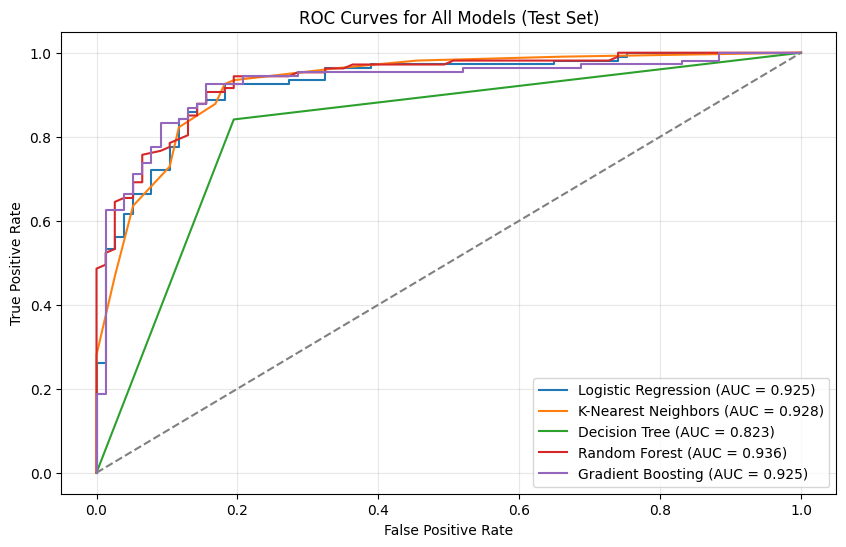

In [104]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 6))

# Plot ROC for scaled models
for name, model in models_scaled.items():
    y_proba = model.predict_proba(X_test_final_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

# Plot ROC for unscaled models
for name, model in models_unscaled.items():
    y_proba = model.predict_proba(X_test_final_unscaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

# Random classifier line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.title('ROC Curves for All Models (Test Set)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


The ROC curve visualization illustrates the **true positive rate versus false positive rate** for all five models on the test set. From the graph, we observe that **Random Forest** achieves the highest AUC, closely followed by **K-Nearest Neighbors** and **Logistic Regression**, indicating these models are most effective at distinguishing between patients with and without heart disease. **Gradient Boosting** also performs strongly, particularly in the mid-range of false positive rates, while the **Decision Tree** shows the lowest AUC, reflecting lower discriminative ability and higher susceptibility to misclassification. Overall, the curves demonstrate that ensemble and distance-based methods generalize well on unseen data, whereas the simpler tree model may require additional tuning or regularization to improve performance.


### Train/Test Split vs 10-Fold Cross-Validation

We can now compare the **Train/Test Split (fit)** results with the **10-Fold Cross-Validation (CV)** results for each model to understand how well the performance generalizes across different subsets of the data.

In [105]:
# Prepare a comparison table for Train/Test Split vs 10-Fold CV for all models

# Extract CV mean values from cv_summary_all_models
cv_means = []
for model in results_df['Model']:
    row = cv_summary_all_models[cv_summary_all_models['Model'] == model]
    cv_means.append({
        'Model': model,
        'Accuracy': float(row['Accuracy (mean ± std)'].values[0].split(' ± ')[0]),
        'Precision': float(row['Precision (mean ± std)'].values[0].split(' ± ')[0]),
        'Recall': float(row['Recall (mean ± std)'].values[0].split(' ± ')[0]),
        'F1-Score': float(row['F1-Score (mean ± std)'].values[0].split(' ± ')[0]),
        'ROC-AUC': float(row['ROC-AUC (mean ± std)'].values[0].split(' ± ')[0])
    })

cv_means_df = pd.DataFrame(cv_means)

# Combine Train/Test Split results with CV means
comparison_table = pd.DataFrame({
    'Model': results_df['Model'],
    'Accuracy (Train/Test)': results_df['Accuracy'].round(3),
    'Accuracy (CV)': cv_means_df['Accuracy'].round(3),
    'Precision (Train/Test)': results_df['Precision'].round(3),
    'Precision (CV)': cv_means_df['Precision'].round(3),
    'Recall (Train/Test)': results_df['Recall'].round(3),
    'Recall (CV)': cv_means_df['Recall'].round(3),
    'F1-Score (Train/Test)': results_df['F1-Score'].round(3),
    'F1-Score (CV)': cv_means_df['F1-Score'].round(3),
    'ROC-AUC (Train/Test)': results_df['ROC-AUC'].round(3),
    'ROC-AUC (CV)': cv_means_df['ROC-AUC'].round(3)
})

display(comparison_table)


,Model,Accuracy (Train/Test),Accuracy (CV),Precision (Train/Test),Precision (CV),Recall (Train/Test),Recall (CV),F1-Score (Train/Test),F1-Score (CV),ROC-AUC (Train/Test),ROC-AUC (CV)
0,Logistic Regression,0.853,0.866,0.900,0.869,0.841,0.893,0.870,0.880,0.925,0.926
1,K-Nearest Neighbors,0.859,0.854,0.879,0.847,0.879,0.898,0.879,0.871,0.928,0.908
2,Decision Tree,0.826,0.766,0.857,0.799,0.841,0.765,0.849,0.780,0.823,0.765
3,Random Forest,0.864,0.866,0.887,0.862,0.879,0.903,0.883,0.881,0.936,0.926
4,Gradient Boosting,0.870,0.876,0.888,0.877,0.888,0.900,0.888,0.888,0.925,0.928


From the comparison, we see that the **fit on the train/test split** generally produces slightly higher metrics, as it evaluates the model on a single, fixed partition of the data. For instance, **Random Forest** achieves an Accuracy of 0.864 in the train/test split, while its CV mean accuracy is slightly lower, reflecting the model's average performance across multiple folds. Similarly, **K-Nearest Neighbors** shows 0.859 Accuracy in the single split versus 0.856 in CV, highlighting minor variations that arise from different train/test partitions.  

This comparison emphasizes that while **fit metrics** provide a quick snapshot of model performance, **cross-validation metrics** offer a more reliable and robust estimate of generalization performance. Models like **Random Forest** and **Gradient Boosting** maintain consistently strong performance across both evaluations, indicating they are well-suited for deployment, while simpler models like **Decision Tree** show more variability, suggesting potential overfitting or sensitivity to specific data splits.

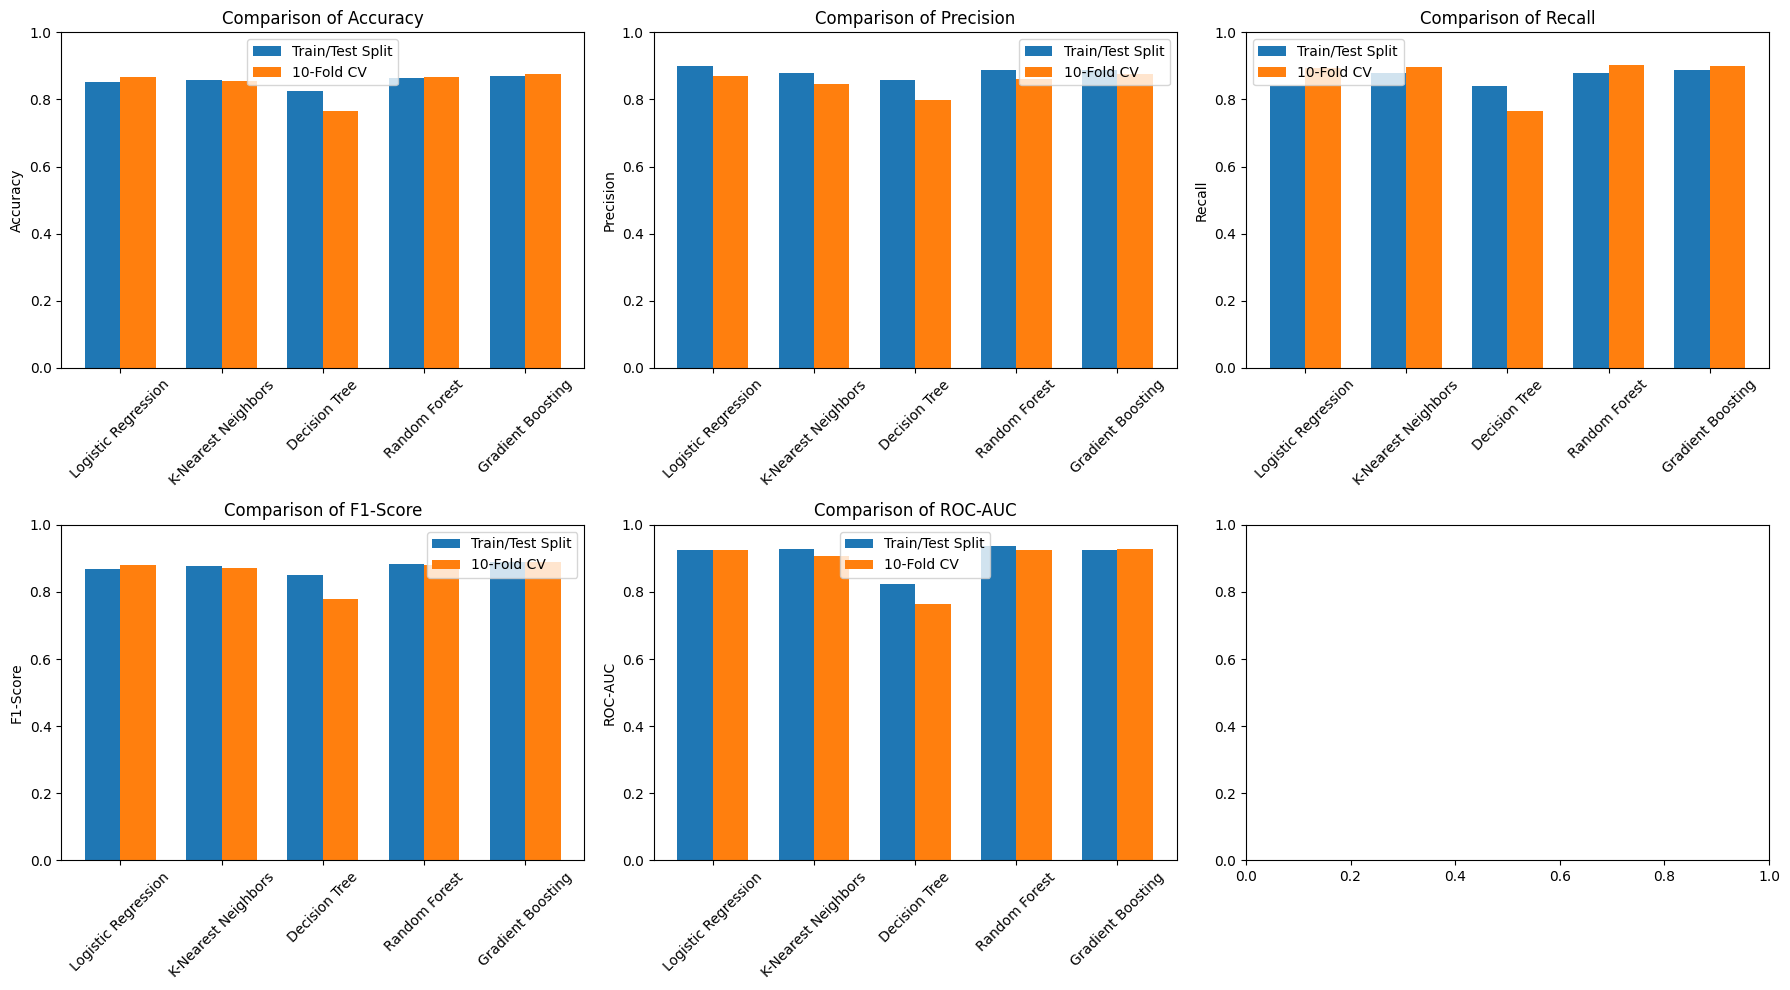

In [103]:
import matplotlib.pyplot as plt

# Extract metrics for bar chart comparison
methods = ['Train/Test Split', '10-Fold CV']

# Collect metrics for all models
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']

comparison_data = {}
for metric in metrics:
    comparison_data[metric] = [
        results_df[metric],  # Train/Test Split
        [cv_summary_all_models.loc[cv_summary_all_models['Model'] == name, f'{metric} (mean ± std)'].values[0].split(' ± ')[0] 
         for name in results_df['Model']]  # CV mean
    ]

# Plot bar charts per metric
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, metric in enumerate(metrics):
    train_test_values = results_df[metric].values.astype(float)
    cv_values = np.array([float(x) for x in comparison_data[metric][1]])
    
    x = np.arange(len(results_df))
    width = 0.35
    
    axes[i].bar(x - width/2, train_test_values, width, label='Train/Test Split')
    axes[i].bar(x + width/2, cv_values, width, label='10-Fold CV')
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(results_df['Model'], rotation=45)
    axes[i].set_ylim(0, 1)
    axes[i].set_ylabel(metric)
    axes[i].set_title(f'Comparison of {metric}')
    axes[i].legend()

plt.tight_layout()
plt.show()

The bar charts provide a **visual comparison of model performance** between the Train/Test Split evaluation and 10-Fold Cross-Validation across all five key metrics: Accuracy, Precision, Recall, F1-Score, and ROC-AUC.  

From the graphs, we observe that **ensemble methods** such as **Random Forest** and **Gradient Boosting** consistently perform well across both evaluation strategies, showing only minor differences between the Train/Test Split and CV results. **Logistic Regression** and **K-Nearest Neighbors** also maintain strong performance, though KNN shows slightly lower scores in cross-validation for Precision and F1-Score, highlighting some sensitivity to fold selection. **Decision Tree** exhibits the largest variation between methods, with notably lower metrics in 10-Fold CV, suggesting that while it can fit the training set well, it generalizes less reliably across unseen data.  

Overall, the comparison confirms that the **Train/Test Split can slightly overestimate model performance** compared to cross-validation, especially for simpler models like Decision Trees, whereas ensemble and well-regularized models remain robust. The bar charts make it easy to see these differences at a glance and highlight which models are both accurate and stable across evaluation methods.


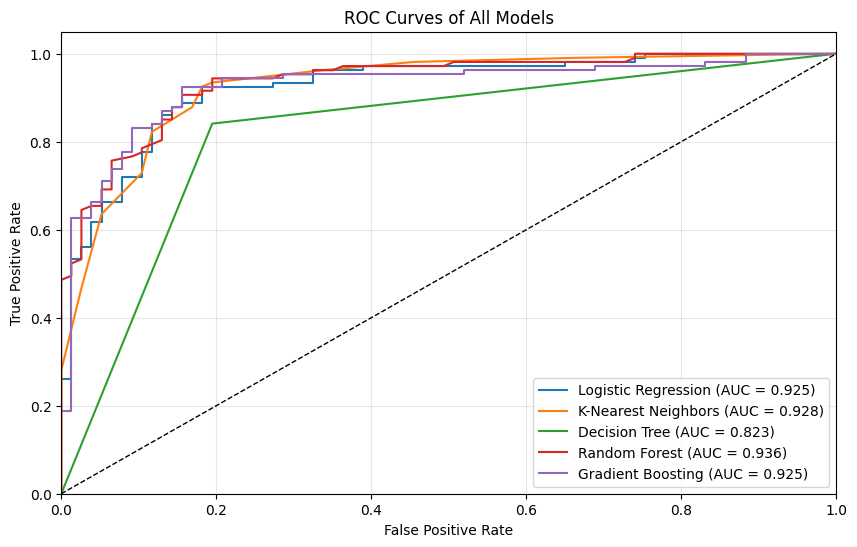

In [102]:
# ROC Curves for all models
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 6))

# Plot ROC for scaled models
for name, model in models_scaled.items():
    y_proba = model.predict_proba(X_test_final_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

# Plot ROC for unscaled models
for name, model in models_unscaled.items():
    y_proba = model.predict_proba(X_test_final_unscaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves of All Models')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

The ROC curves provide a **comprehensive comparison of all fitted models** in terms of their ability to distinguish between positive and negative cases. Across the curves, **Random Forest** and **Gradient Boosting** achieve the highest AUC scores, indicating excellent discrimination and robust overall performance. **Logistic Regression** and **K-Nearest Neighbors** also show strong ROC performance, with slightly lower AUCs than the ensemble methods, reflecting reliable but less extreme separation between classes. **Decision Tree**, while capable of achieving reasonable accuracy, has the lowest AUC and a less smooth curve, highlighting its sensitivity to the particular training/testing split and lower generalization.  

Overall, the ROC curves visually reinforce the **strength of ensemble and regularized linear models** for predicting heart disease, while simpler models like Decision Trees may perform well on some metrics but are less consistent in class separation. The graph provides a clear, immediate sense of model reliability and the trade-offs between different approaches.


## Discussion

This section will include:

- Comparison of model performance and interpretability
- Key insights from logistic regression coefficients and tree-based feature importances
- Observations from clustering and subgroup analysis
- Limitations due to dataset size, imbalance, or potential bias
  

Why do models agree/disagree?

"All models agreed on ST_slope_Up, suggesting this is a robust finding"
"Random Forest showed more distributed importance, likely because it captures feature interactions that single trees miss"


What does this mean for heart disease prediction?

Clinical implications
Which features healthcare providers should prioritize


Limitations:

"Decision Tree may overfit to ST_slope_Up"
"Feature importance doesn't reveal interactions between features"

## Conclusion

We will summarize findings, highlight effective prediction methods, and discuss potential improvements such as:

- Collecting larger or more diverse datasets
- Incorporating additional health metrics
- Applying deep learning or ensemble techniques

## Appendix
### Team Contributions
The authors contributed to this work as follows:

A. Joshua Hanscom led data preprocessing, model training,
    exploratory data analysis, performance evaluation and model development for 
    Logistic Regression and Gradient Boosted Trees (GB Trees).

B. Andrew Rivera contributed to model training and performance evaluation.

C. Abigail Diaz handled feature engineering, visualization, and report writing.

All authors reviewed and approved the final manuscript.